In [1]:
#perform the same in this, our aim is to find the csv files , in this code we calculate for 4 bearings of test 1
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [2]:
# we want to perform the same process for test 1 and test 3 what ever we did in previoi

In [3]:
path=r'D:\ml_datasets\bearing\1st_test\1st_test'

In [4]:
filename = '2003.10.22.12.06.24'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
dataset

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


In [5]:
dataset

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


In [12]:
def compute_skewness(x): 
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [13]:
def compute_kurtosis(x): 
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [14]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\1st_test\1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
    
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2003.10.22.12.06,0.388,-0.720,-0.094593,0.081124,0.124614,-0.029991,1.068765,3.113619,-1.317370
2003.10.22.12.09,0.388,-0.654,-0.094903,0.079517,0.123811,-0.070070,1.161145,3.133804,-1.304613
2003.10.22.12.14,0.317,-0.623,-0.096187,0.080219,0.125246,-0.041643,0.985896,2.531011,-1.302116
2003.10.22.12.19,0.457,-0.598,-0.095613,0.080827,0.125197,0.005161,1.033900,3.650234,-1.309422
2003.10.22.12.24,0.388,-0.623,-0.095133,0.082036,0.125618,-0.060191,1.109762,3.088726,-1.320447
...,...,...,...,...,...,...,...,...,...
2003.11.25.16.07,0.476,-0.669,-0.117540,0.120931,0.168639,0.000653,0.476461,2.822593,-1.434745
2003.11.25.23.13,0.513,-0.803,-0.117403,0.129745,0.174975,-0.052188,0.554562,2.931849,-1.490383
2003.11.25.23.19,0.449,-0.710,-0.118305,0.128373,0.174571,-0.080797,0.382898,2.572023,-1.475599
2003.11.25.23.29,0.522,-0.776,-0.118272,0.126904,0.173471,-0.009058,0.514649,3.009143,-1.466712


In [15]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.388,-0.720,-0.094593,0.081124,0.124614,-0.029991,1.068765,3.113619,-1.317370
2003-10-22 12:09:00,0.388,-0.654,-0.094903,0.079517,0.123811,-0.070070,1.161145,3.133804,-1.304613
2003-10-22 12:14:00,0.317,-0.623,-0.096187,0.080219,0.125246,-0.041643,0.985896,2.531011,-1.302116
2003-10-22 12:19:00,0.457,-0.598,-0.095613,0.080827,0.125197,0.005161,1.033900,3.650234,-1.309422
2003-10-22 12:24:00,0.388,-0.623,-0.095133,0.082036,0.125618,-0.060191,1.109762,3.088726,-1.320447
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.476,-0.669,-0.117540,0.120931,0.168639,0.000653,0.476461,2.822593,-1.434745
2003-11-25 23:13:00,0.513,-0.803,-0.117403,0.129745,0.174975,-0.052188,0.554562,2.931849,-1.490383
2003-11-25 23:19:00,0.449,-0.710,-0.118305,0.128373,0.174571,-0.080797,0.382898,2.572023,-1.475599
2003-11-25 23:29:00,0.522,-0.776,-0.118272,0.126904,0.173471,-0.009058,0.514649,3.009143,-1.466712


In [16]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_1.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.388,-0.720,-0.094593,0.081124,0.124614,-0.029991,1.068765,3.113619,-1.317370
2003-10-22 12:09:00,0.388,-0.654,-0.094903,0.079517,0.123811,-0.070070,1.161145,3.133804,-1.304613
2003-10-22 12:14:00,0.317,-0.623,-0.096187,0.080219,0.125246,-0.041643,0.985896,2.531011,-1.302116
2003-10-22 12:19:00,0.457,-0.598,-0.095613,0.080827,0.125197,0.005161,1.033900,3.650234,-1.309422
2003-10-22 12:24:00,0.388,-0.623,-0.095133,0.082036,0.125618,-0.060191,1.109762,3.088726,-1.320447
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.476,-0.669,-0.117540,0.120931,0.168639,0.000653,0.476461,2.822593,-1.434745
2003-11-25 23:13:00,0.513,-0.803,-0.117403,0.129745,0.174975,-0.052188,0.554562,2.931849,-1.490383
2003-11-25 23:19:00,0.449,-0.710,-0.118305,0.128373,0.174571,-0.080797,0.382898,2.572023,-1.475599
2003-11-25 23:29:00,0.522,-0.776,-0.118272,0.126904,0.173471,-0.009058,0.514649,3.009143,-1.466712


In [17]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=2# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\1st_test\1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)

In [18]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

In [19]:
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.701,-0.564,-0.093880,0.070650,0.117493,0.220100,3.065291,5.966305,-1.251523
2003-10-22 12:09:00,0.581,-0.491,-0.093891,0.069531,0.116833,0.126489,2.000528,4.972931,-1.244340
2003-10-22 12:14:00,0.549,-0.469,-0.095863,0.069465,0.118384,0.151039,1.968466,4.637434,-1.234937
2003-10-22 12:19:00,0.535,-0.474,-0.095307,0.071267,0.119005,0.099487,1.744906,4.495626,-1.248651
2003-10-22 12:24:00,0.386,-0.537,-0.095495,0.072155,0.119688,0.095877,1.180752,3.225039,-1.253349
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.491,-0.588,-0.117819,0.100236,0.154687,0.064062,0.437867,3.174156,-1.312920
2003-11-25 23:13:00,0.657,-0.623,-0.116547,0.106257,0.157712,0.053014,0.827787,4.165810,-1.353208
2003-11-25 23:19:00,0.564,-0.615,-0.117143,0.104977,0.157296,0.037936,0.527038,3.585590,-1.342769
2003-11-25 23:29:00,0.637,-0.645,-0.118896,0.106118,0.159363,0.033240,0.537047,3.997153,-1.340358


In [20]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=3# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\1st_test\1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.359,-0.674,-0.093817,0.090650,0.130455,-0.092067,0.209173,2.751901,-1.390537
2003-10-22 12:09:00,0.291,-0.645,-0.095620,0.090260,0.131490,-0.101433,0.229069,2.213098,-1.375137
2003-10-22 12:14:00,0.339,-0.613,-0.096213,0.090237,0.131906,-0.092065,0.208387,2.570019,-1.370982
2003-10-22 12:19:00,0.286,-0.598,-0.095777,0.090274,0.131614,-0.105791,0.188712,2.173018,-1.374174
2003-10-22 12:24:00,0.349,-0.725,-0.095952,0.088864,0.130779,-0.091974,0.260539,2.668628,-1.362964
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.518,-0.781,-0.116901,0.146956,0.187779,-0.067323,0.332488,2.758560,-1.606308
2003-11-25 23:13:00,0.547,-0.776,-0.116428,0.164493,0.201525,0.035610,0.176369,2.714309,-1.730891
2003-11-25 23:19:00,0.728,-0.869,-0.118304,0.170994,0.207927,0.045444,0.367062,3.501234,-1.757559
2003-11-25 23:29:00,0.439,-0.991,-0.118210,0.157582,0.196989,-0.086948,0.212154,2.228553,-1.666433


In [21]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=4# Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\1st_test\1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.256,-0.530,-0.093752,0.077510,0.121642,-0.053179,0.291900,2.104534,-1.297495
2003-10-22 12:09:00,0.242,-0.625,-0.095076,0.076741,0.122182,-0.032984,0.291324,1.980656,-1.285092
2003-10-22 12:14:00,0.286,-0.432,-0.096573,0.077098,0.123572,-0.028978,0.172986,2.314434,-1.279579
2003-10-22 12:19:00,0.244,-0.483,-0.095975,0.076530,0.122750,-0.050400,0.319507,1.987774,-1.278988
2003-10-22 12:24:00,0.266,-0.571,-0.095229,0.076046,0.121866,-0.044490,0.340498,2.182727,-1.279717
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.488,-0.598,-0.117200,0.117993,0.166306,0.154388,0.402511,2.934349,-1.418989
2003-11-25 23:13:00,0.496,-0.830,-0.116559,0.142499,0.184095,-0.038668,0.532902,2.694264,-1.579417
2003-11-25 23:19:00,0.552,-0.791,-0.118188,0.150242,0.191155,-0.023059,0.585151,2.887714,-1.617372
2003-11-25 23:29:00,0.488,-0.820,-0.118192,0.146346,0.188110,0.052214,0.239894,2.594227,-1.591566


In [22]:
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_1.csv")
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_1.csv",index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index)

In [23]:
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_1.csv")
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_1.csv",index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index)

In [24]:
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_1.csv")
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_1.csv",index_col='Unnamed: 0')
df4.index = pd.to_datetime(df4.index)

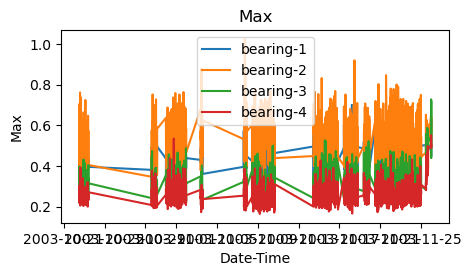

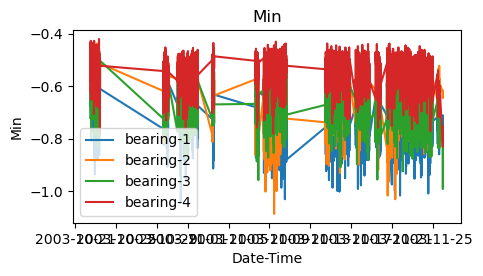

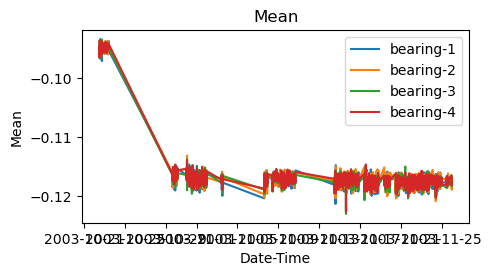

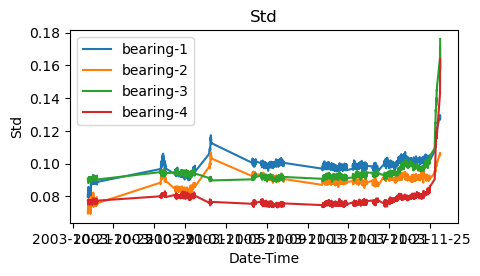

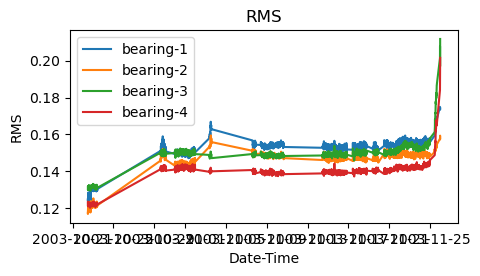

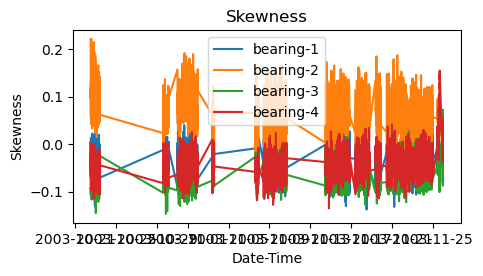

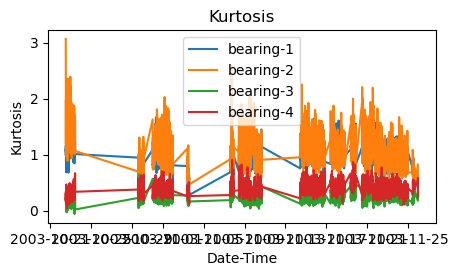

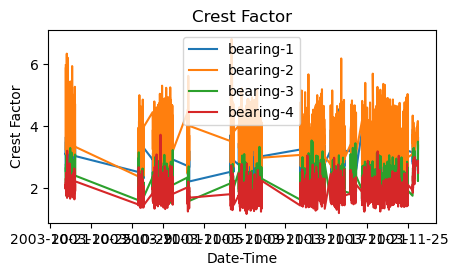

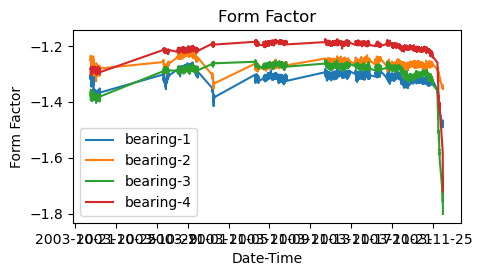

In [26]:
for col in (df1.columns):  
    
        plt.figure(figsize=(5,2.5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

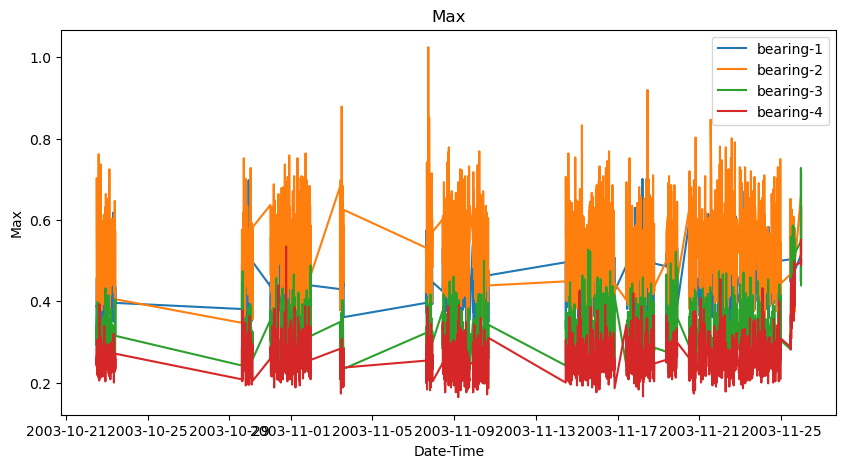

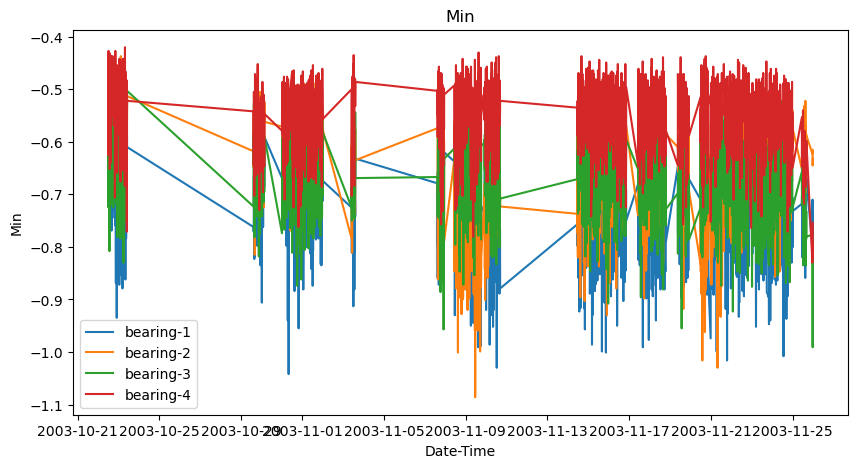

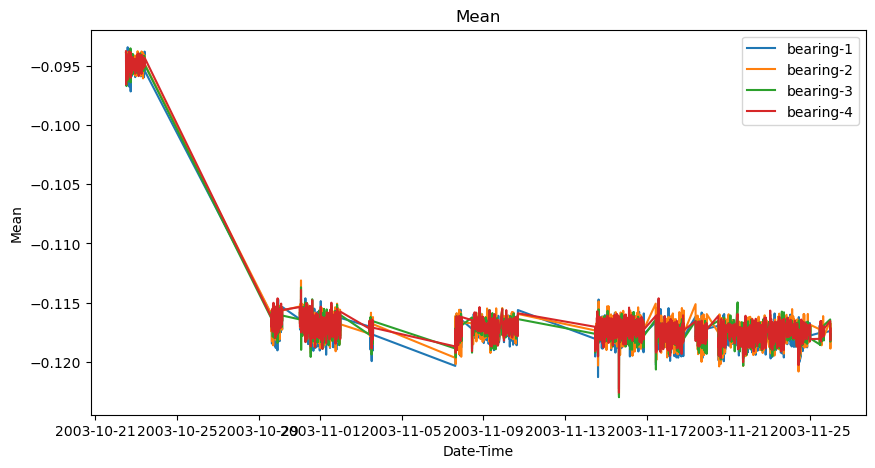

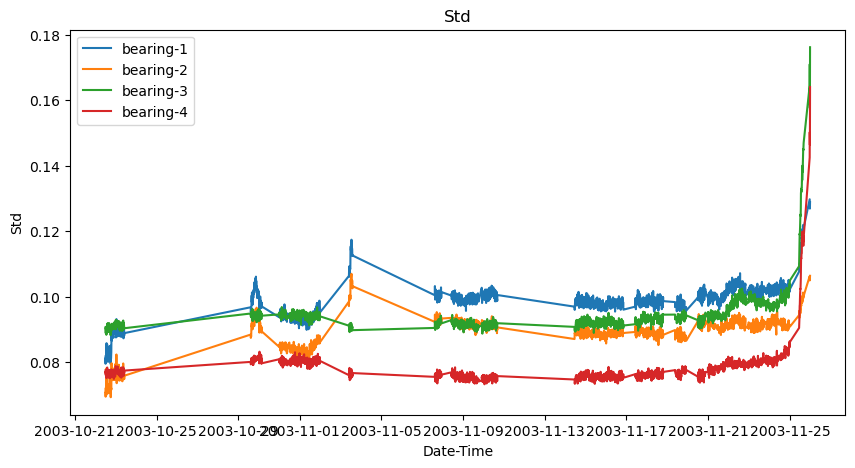

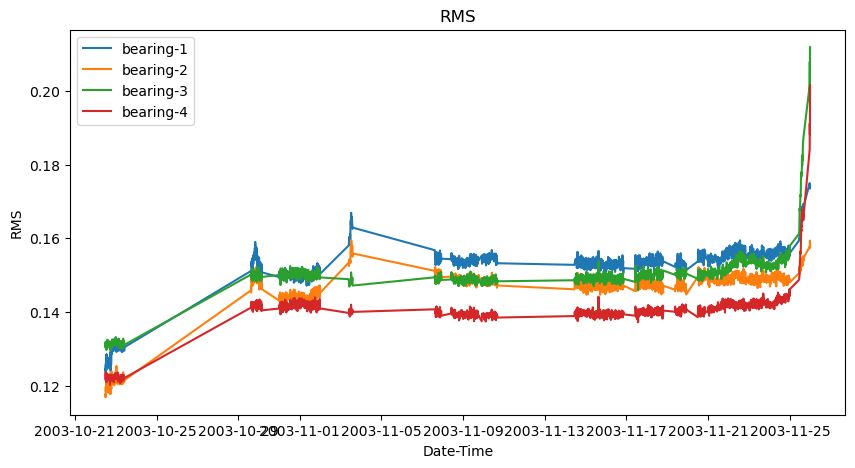

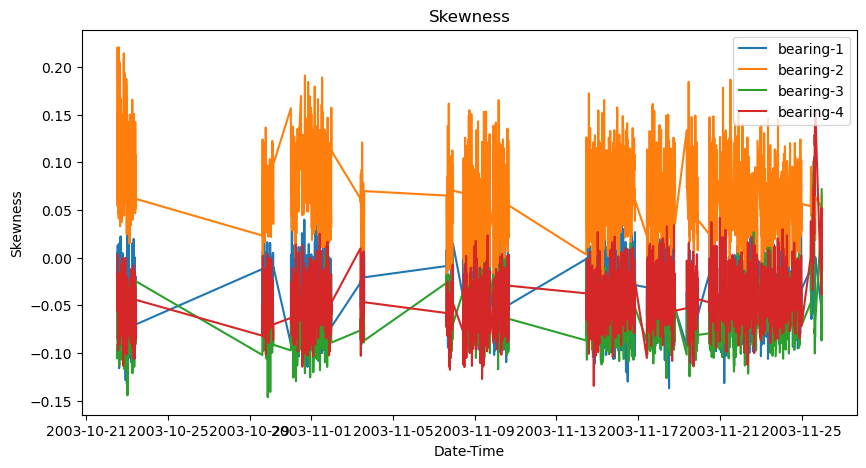

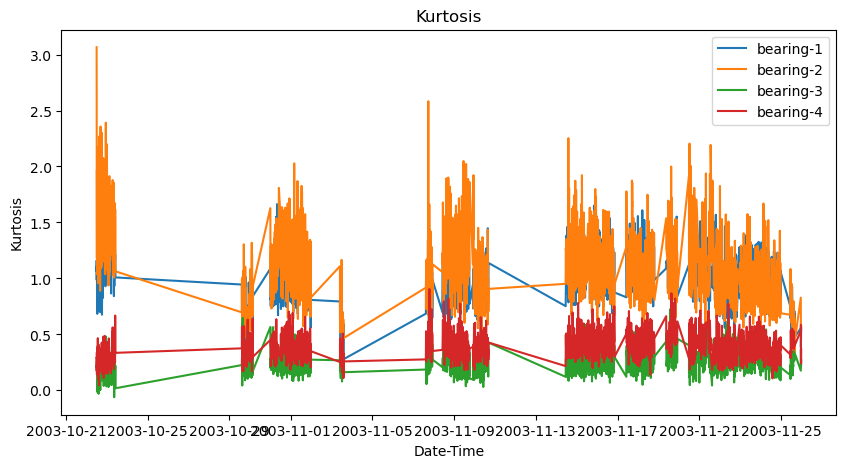

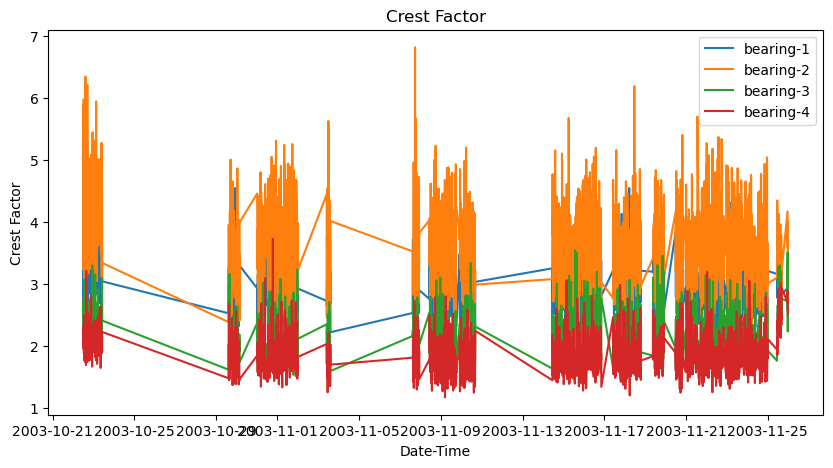

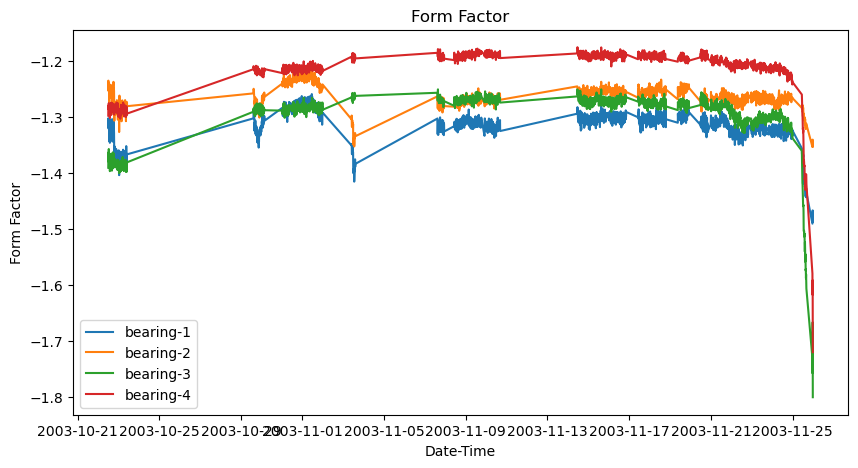

In [28]:
for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [29]:
#similar way find the inner deffect csv file by using bearing 3 data
df_irf=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_irf)):
    fault.append('Inner Race')

df_irf['Fault']=fault
df_irf

C:\Users\sujal\AppData\Local\Temp\ipykernel_13060\1442353547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.315,-0.598,-0.117176,0.093689,0.150024,-0.066519,0.237738,2.099659,-1.280337,Inner Race
2003-11-21 00:44:00,0.388,-0.627,-0.117639,0.093396,0.150204,-0.051036,0.289413,2.583150,-1.276826,Inner Race
2003-11-21 00:54:00,0.376,-0.725,-0.118024,0.093985,0.150873,-0.058157,0.371994,2.492168,-1.278317,Inner Race
2003-11-21 01:04:00,0.332,-0.757,-0.117134,0.092784,0.149428,-0.040069,0.239665,2.221806,-1.275705,Inner Race
2003-11-21 01:14:00,0.291,-0.625,-0.117235,0.094154,0.150362,-0.066275,0.307553,1.935335,-1.282564,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.305,-0.696,-0.117918,0.100268,0.154783,-0.058312,0.238568,1.970500,-1.312634,Inner Race
2003-11-24 17:47:00,0.269,-0.564,-0.116705,0.099393,0.153292,-0.085474,0.162001,1.754823,-1.313502,Inner Race
2003-11-24 17:57:00,0.286,-0.652,-0.117893,0.100989,0.155232,-0.044501,0.183394,1.842403,-1.316722,Inner Race
2003-11-24 18:07:00,0.322,-0.835,-0.118377,0.101158,0.155710,-0.066844,0.379393,2.067950,-1.315373,Inner Race


In [30]:
df_irf.to_csv('inner_race_fault.csv',index=False)#convert that file 

In [31]:
#similar for roller element using bearing 4 data
df_ref=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_ref)):
    fault.append('Roller Element')

df_ref['Fault']=fault
df_ref

C:\Users\sujal\AppData\Local\Temp\ipykernel_13060\1836188734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.261,-0.562,-0.117867,0.076821,0.140690,-0.009869,0.382108,1.855141,-1.193636,Roller Element
2003-11-21 00:44:00,0.295,-0.657,-0.116988,0.076044,0.139530,-0.037429,0.644513,2.114243,-1.192685,Roller Element
2003-11-21 00:54:00,0.269,-0.525,-0.117555,0.076884,0.140464,-0.017772,0.452600,1.915087,-1.194876,Roller Element
2003-11-21 01:04:00,0.220,-0.527,-0.116833,0.075196,0.138940,-0.022964,0.453947,1.583422,-1.189213,Roller Element
2003-11-21 01:14:00,0.327,-0.532,-0.118223,0.077386,0.141297,-0.056806,0.714296,2.314273,-1.195177,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:00,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706,Roller Element
2003-11-24 17:47:00,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223,Roller Element
2003-11-24 17:57:00,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654,Roller Element
2003-11-24 18:07:00,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588,Roller Element


In [32]:
df_ref.to_csv('roller_element_fault.csv',index=False)# convert to csv